In [1]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import h5py
import numpy as np
import glob
import shutil
matplotlib.rcParams['figure.figsize'] = [15, 15]
pd.options.mode.chained_assignment = None

### TNEID LNEN_Molecular_groups_barlow_twin_z128_230124

In [2]:
tne_proj_by_sample = "/home/mathiane/LNENWork/LNEN_Molecular_groups_barlow_twin_z128_230124/projector/projector_by_samples"
tne_id_proj_by_sample = []
for folder in os.listdir(tne_proj_by_sample):
    tne_id_proj_by_sample.append(folder[:7])

In [3]:
len(tne_id_proj_by_sample)

297

In [4]:
len(set(tne_id_proj_by_sample))

287

# Link each TNEID to a molecular archetype

In [5]:
# data from : /data/lungNENomics/work/Descriptive_manuscript_data/MOFA/MOFA.Exp.Meth.Alt.CNV_lungNENomicsCombined/ParetoTI/variables_archetypes_MOFA_LNET.RData
archetype = pd.read_csv("Mofa_partoTI_archetypes.csv")
archetype.head()

,Unnamed: 0,manuscript_id,sample_id,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,...,PFS_census_status,PFS_months,Alcala2019_cluster_LNET,Alcala2019_cluster_LNEN,published_cluster,published_cluster_v2,archetype_k3_LF2,archetype_k3_LF2_label,archetype_k4_LF3,archetype_k4_LF3_label
0,1,LNEN002,LNEN002,2.931527,-0.778837,-2.822321,-0.005001,0.654035,0.472506,-0.338176,...,NaN,NaN,Ca B,Ca B,Ca B,Ca B,V2,Ca B,V3,Ca B
1,2,LNEN003,LNEN003,0.141281,1.908876,-0.558505,0.350397,0.381332,0.391136,-0.052032,...,NaN,NaN,Ca A2,Ca A,Ca A2,Ca A2,V3,Ca A2,V4,Ca A2
2,3,LNEN004,LNEN004,0.121415,2.148833,-0.492770,0.273303,0.423751,-0.055546,-0.096825,...,NaN,NaN,Ca A2,Ca A,Ca A2,Ca A2,V3,Ca A2,V4,Ca A2
3,4,LNEN005,LNEN005,-0.053188,-0.663662,0.872511,0.665158,-5.139342,1.168464,0.925062,...,NaN,NaN,Ca A1,LCNEC,supra-carcinoid,supra-carcinoid,V1,Ca A1,V1,sc-enriched
4,5,LNEN006,LNEN006,0.290015,1.270474,0.670284,-0.559943,0.224200,-0.206417,-0.091758,...,NaN,NaN,Ca A2,Ca A,Ca A2,Ca A2,V3,Ca A2,V4,Ca A2


In [6]:
archetype[archetype["manuscript_id"] =="LNEN70"]

,Unnamed: 0,manuscript_id,sample_id,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,...,PFS_census_status,PFS_months,Alcala2019_cluster_LNET,Alcala2019_cluster_LNEN,published_cluster,published_cluster_v2,archetype_k3_LF2,archetype_k3_LF2_label,archetype_k4_LF3,archetype_k4_LF3_label


In [7]:
## Samples with WSI not included in path review
archetype[archetype["manuscript_id"].isin( ["LNEN085", "LNEN067", "LNEN148", "LNEN1487", "LNEN083", "LNEN087", "LNEN265", "LNEN088", "LNEN090", "LNEN090", "LNEN233", "LNEN269", "LNEN150", "LNEN159", "LNEN161", "LNEN158", "LNEN064", "LNEN068", "LNEN070", "LNEN074"])]

,Unnamed: 0,manuscript_id,sample_id,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,...,PFS_census_status,PFS_months,Alcala2019_cluster_LNET,Alcala2019_cluster_LNEN,published_cluster,published_cluster_v2,archetype_k3_LF2,archetype_k3_LF2_label,archetype_k4_LF3,archetype_k4_LF3_label
54,55,LNEN064,LNEN064_TU,0.395743,1.648072,1.560168,-0.197718,0.192657,0.641721,0.576020,...,event,34.684932,NaN,NaN,NaN,NaN,V3,Ca A2,V4,Ca A2
56,57,LNEN067,LNEN067_TU,3.247110,-0.959521,1.791496,-0.081695,0.848776,-0.286584,-0.373816,...,event,15.057534,NaN,NaN,NaN,NaN,V2,Ca B,V3,Ca B
57,58,LNEN068,LNEN068_TU,-1.793988,-1.085512,0.017674,-0.603983,-0.440940,-0.587372,-0.125941,...,no,49.413699,NaN,NaN,NaN,NaN,V1,Ca A1,V2,Ca A1
62,63,LNEN074,LNEN074_TU,-0.111066,1.626011,-0.257684,-0.268503,-0.686188,-0.870299,0.430799,...,no,31.463014,NaN,NaN,NaN,NaN,V3,Ca A2,V4,Ca A2
68,69,LNEN083,LNEN083_TU,3.414523,-0.823555,1.702012,-0.346832,0.076313,-0.897325,-0.877881,...,event,56.284932,NaN,NaN,NaN,NaN,V2,Ca B,V3,Ca B
70,71,LNEN085,LNEN085_TU,-1.218896,-1.287995,-0.423569,0.497622,0.397732,1.145288,-0.914308,...,no,7.232877,NaN,NaN,NaN,NaN,V1,Ca A1,V2,Ca A1
72,73,LNEN087,LNEN087_TU,3.103592,-1.015906,-0.709335,0.526408,0.475632,-0.032143,0.210661,...,no,35.210959,NaN,NaN,NaN,NaN,V2,Ca B,V3,Ca B
74,75,LNEN090,LNEN090_TU,3.278925,-0.958587,2.905706,0.400636,0.819430,-0.511567,-0.849916,...,event,6.213699,NaN,NaN,NaN,NaN,V2,Ca B,V3,Ca B
127,128,LNEN148,LNEN148_TU,-2.078536,-1.112718,-0.409050,0.421245,0.864231,-0.623202,-0.555842,...,no,36.558904,NaN,NaN,NaN,NaN,V1,Ca A1,V2,Ca A1
135,136,LNEN158,LNEN158_TU,2.985736,-1.068351,-1.790226,-0.211038,0.972580,-0.189223,0.082679,...,NaN,NaN,NaN,NaN,NaN,NaN,V2,Ca B,V3,Ca B


In [8]:
# Get TNE_ID with Barlow-Twins projections
BT_all_proj = pd.read_csv("/home/mathiane/LNENWork/LNEN_Molecular_groups_barlow_twin_z128_230124/projector/concat_proj_by_patient/barlowTwins_trainset_z128_all_projectors.csv")

In [9]:
BT_all_proj.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,img_id,tne_id
0,0,0.014134,-0.036659,0.108797,-0.020320,-0.183882,-0.158611,-0.390732,0.450400,-0.230636,...,0.142014,0.036670,0.209818,0.259894,-0.175666,-0.049203,0.155002,-0.193426,TNE0998-HES_39937_19969,TNE0998
1,1,0.424568,-0.333537,0.159116,-0.219581,-0.692004,0.089616,-0.662468,0.479987,-0.274777,...,0.219200,-0.198738,0.790976,0.552608,-0.409785,-0.694339,0.184964,-0.566910,TNE0998-HES_24961_28801,TNE0998
2,2,-0.321689,0.041651,-0.244557,0.082380,0.179816,-0.218460,0.147972,0.335791,-0.294279,...,0.228598,0.435071,-0.001598,0.261430,0.451361,0.240551,0.657040,-0.052835,TNE0998-HES_65665_12289,TNE0998
3,3,0.138407,-0.063928,0.154682,-0.181787,-0.206345,-0.216315,-0.327487,0.332824,-0.121108,...,0.215948,-0.074474,0.308819,0.455160,0.083201,-0.138410,0.147380,-0.207688,TNE0998-HES_60673_40705,TNE0998
4,4,-0.101540,0.008802,-0.018226,0.128611,0.018626,-0.151120,0.158882,-0.050406,-0.013607,...,0.167913,-0.068703,0.000199,0.160867,0.151158,0.143264,-0.122441,-0.057880,TNE0998-HES_82177_26113,TNE0998


In [15]:
len(set(BT_all_proj["tne_id"]))

286

In [13]:
BT_all_proj.shape

(4917726, 131)

In [21]:
tne_id_HES

case_number
1      TNE0056
2      TNE0057
3      TNE0058
4      TNE0060
5      TNE0061
        ...   
261    TNE1009
262    TNE0005
263    TNE1080
264    TNE1082
265    TNE1087
Name: TNEID, Length: 265, dtype: object

In [22]:
## Load clinical data
clinical_df = pd.read_excel('/data/lungNENomics/work/Descriptive_manuscript_data/Clinical_data/lungNENomics_clinical_v39.xlsx', index_col=0, skiprows=[0],
                            engine='openpyxl') 
clinical_df.head()
clinical_df['centre_patient_id'] = clinical_df.index
## Get patients in WSI data base
all_wsi = glob.glob("/home/mathiane/LNEN_img_db/*/HES/Leica/x40/*/*/*")
centre = []
staining = []
scanner = []
mag = []
patient_id = []
tne_id = []
for ele in all_wsi:
    wsi_details = ele.split("/")
    centre.append(wsi_details[4])
    staining.append(wsi_details[5])
    scanner.append(wsi_details[6])
    mag.append(wsi_details[7])
    patient_id.append(wsi_details[8])
    tne_id.append(wsi_details[9])
WSI_df = pd.DataFrame({"centre" : centre, "staining": staining, "scanner":scanner,
                       "mag":mag, "patient_id":patient_id, "tne_id" : tne_id})
print(WSI_df[WSI_df["tne_id"]=="TNE1088"])
sum(WSI_df.duplicated())
WSI_df = WSI_df.drop_duplicates()
WSI_df.shape
## Restrict research in df to TNEID with BT proj
WSI_df = WSI_df[WSI_df["tne_id"].isin(list(BT_all_proj["tne_id"]))]
## Get patients with multiples WSI
patients_with_several_wsi = WSI_df[WSI_df.duplicated("patient_id")]["patient_id"]
len(patients_with_several_wsi)

patients_with_several_wsi
WSI_df[WSI_df["patient_id"] == "AN14006022"]
## Load path review to select TNEID included in path-review for patients with several WSIs
path_review = pd.read_excel('/home/mathiane/LNENWork/ESMOOpenFinalScripts/data/pathological_review_concensus_data_2112022.xlsx', index_col=0, skiprows=[0],
                            engine='openpyxl') 
path_review.head()
tne_id_HES = path_review[path_review["material"]=="HES"]["TNEID"]
c = 0 
tne_to_ignore = [] # For patients with several HE at mag 40 that were include in the path-review we ignore the WSI that were not used by pathologists
for tne_path_review in tne_id_HES:
    #print(tne_path_review)
    if WSI_df[WSI_df["tne_id"] == tne_path_review].shape[0] == 0:
        print(f"WARNING {tne_path_review} included path review has no bt proj")
    else:
        tne_patientid = WSI_df[WSI_df["tne_id"] == tne_path_review]["patient_id"].values[0]
        if tne_patientid in list(patients_with_several_wsi):
            # TNE to ignore
            tne_to_ignore.append(WSI_df[(WSI_df["patient_id"] == tne_patientid) & (~WSI_df["tne_id"].isin(tne_id_HES))]["tne_id"].values[0])
            c += 1
print(c) # Conclusion 34 patients can be selected like this 
## Between TNE2142 an TNE2141:
## Choice TNE2142 => Bigger more context warning not the same block!
to_ingore = ["TNE2141"]
## Between TNE0797 an TNE2104:
## Choice TNE0797 => TNE2104 roughly no tumour tissue
to_ingore.append("TNE2104")
## Between TNE1496, TNE0590, TNE0589
## Ignore TNE0590 => few tissue
## Note TNE1496 and TNE090 | TNE0589 not the same block 
## Random choice
to_ingore.append("TNE0590")
to_ingore.append("TNE0589")
# WARNING : DEAL WITH THIS INFO LATER
print(WSI_df.shape)
WSI_df = WSI_df[~WSI_df["tne_id"].isin(tne_to_ignore)]
print(WSI_df.shape)
## Get remaining patient ID with several WSIs
patient_id_several_wsi_not_in_path_review = WSI_df[WSI_df.duplicated("patient_id")]["patient_id"]
for patient in list(patient_id_several_wsi_not_in_path_review):
    print(WSI_df[WSI_df["patient_id"]==patient])
    print("---------------------------------")
print(WSI_df.shape)
WSI_df = WSI_df[~WSI_df["tne_id"].isin(to_ingore)]
print(WSI_df.shape)
patient_id_corrected  = []
for patient_id in list(WSI_df["patient_id"]):
    if patient_id.find("LCCH") != -1:
        print(patient_id, "LCCH-" + patient_id.split("-")[1])
        patient_id_corrected.append("LCCH-" + patient_id.split("-")[1])
    
    elif patient_id == "19.15936A":
        print(patient_id, "19.15936 A- A25")
        patient_id_corrected.append("19.15936 A- A25")
        
    elif patient_id.find(".") != -1 :
        print(patient_id, patient_id.replace(".", "/"))
        patient_id_corrected.append(patient_id.replace(".", "/"))
        
    elif patient_id == "AN14018907" :
        print(patient_id, "1424863")
        patient_id_corrected.append("1424863")
        
    elif patient_id == "AN16006491":
        print(patient_id, "1607106")
        patient_id_corrected.append("1607106")

        
    elif patient_id == "AN15012673":
        print(patient_id, "1515223")
        patient_id_corrected.append("1515223")

    elif patient_id == "AN14006022":
        print(patient_id , "1316113")
        patient_id_corrected.append("1316113")
        
    elif patient_id == "AN16003873":
        print(patient_id , "1518417")
        patient_id_corrected.append("1518417")
        
    elif patient_id == "AN16009141":
        print(patient_id , "1609329")
        patient_id_corrected.append("1609329")
        
    elif patient_id == "46404_1997":
        print(patient_id, "46404/1997")
        patient_id_corrected.append("46404/1997")
        
    elif patient_id == "1594_2009":
        print(patient_id, "1594/2009")
        patient_id_corrected.append("1594/2009")
        
    elif patient_id == "92276":
        print(patient_id, "000092276")
        patient_id_corrected.append("000092276")
        
    elif patient_id == "40072_1997":
        print(patient_id, "40072/1997")
        patient_id_corrected.append("40072/1997")


    else:
        patient_id_corrected.append(patient_id)

WSI_df["patient_id_corrected"] = patient_id_corrected
len(set(WSI_df["patient_id_corrected"]))
clinical_df.index = clinical_df.index.astype('str')

   centre staining scanner  mag patient_id   tne_id
94  Paris      HES   Leica  x40   ML123079  TNE1088
WARNING TNE1088 included path review has no bt proj
WARNING TNE1089 included path review has no bt proj
WARNING TNE1075 included path review has no bt proj
WARNING TNE1076 included path review has no bt proj
WARNING TNE1077 included path review has no bt proj
WARNING TNE1078 included path review has no bt proj
WARNING TNE1079 included path review has no bt proj
WARNING TNE1085 included path review has no bt proj
WARNING TNE1086 included path review has no bt proj
WARNING TNE1090 included path review has no bt proj
WARNING TNE1093 included path review has no bt proj
WARNING TNE1094 included path review has no bt proj
WARNING TNE1095 included path review has no bt proj
WARNING TNE1097 included path review has no bt proj
WARNING TNE1098 included path review has no bt proj
WARNING TNE1099 included path review has no bt proj
WARNING TNE1100 included path review has no bt proj
WARNING TNE1

In [ ]:
clinical_df["centre_patient_id_col"] = clinical_df.index

In [8]:
WSI_df_clinical_tmp2 = WSI_df.merge(clinical_df, left_on='patient_id_corrected', right_on='centre_patient_id_col', how='inner')

KeyError: 'centre_patient_id_col'

In [9]:
WSI_df_clinical_tmp2.shape

NameError: name 'WSI_df_clinical_tmp2' is not defined

In [29]:
WSI_df[~WSI_df["patient_id_corrected"].isin(list(WSI_df_clinical_tmp2["centre_patient_id_col"])) ]

,centre,staining,scanner,mag,patient_id,tne_id,patient_id_corrected
112,Nancy,HES,Leica,x40,19B1596,TNE2158,19B1596
117,Nancy,HES,Leica,x40,12H02399_T2,TNE0342,12H02399_T2
120,Nancy,HES,Leica,x40,09H5932_B,TNE0221,09H5932_B
126,Nancy,HES,Leica,x40,17.2293,TNE2155,17/2293
127,Nancy,HES,Leica,x40,09H5932_A,TNE0217,09H5932_A
132,Nancy,HES,Leica,x40,12H02399_T5,TNE0345,12H02399_T5


In [30]:
WSI_df_clinical = WSI_df_clinical_tmp2

In [31]:
print(WSI_df_clinical.shape, WSI_df_clinical[WSI_df_clinical["manuscript_id"] != "."].shape)

(264, 90) (233, 90)


In [32]:
print(WSI_df_clinical.shape,
WSI_df_clinical.merge(archetype, on='manuscript_id', how='inner').shape)

(264, 90) (185, 135)


In [33]:
WSI_df_clinical_with_manuscript_id = WSI_df_clinical[WSI_df_clinical["manuscript_id"] != "."]

In [34]:
WSI_df_clinical_arch = WSI_df_clinical.merge(archetype, on='manuscript_id', how='inner')

In [35]:
set(WSI_df_clinical_with_manuscript_id["manuscript_id"]) - set(WSI_df_clinical_arch["manuscript_id"])

{'LNEN045',
 'LNEN046',
 'LNEN049',
 'LNEN059',
 'LNEN062',
 'LNEN070',
 'LNEN075',
 'LNEN078',
 'LNEN080',
 'LNEN088',
 'LNEN120',
 'LNEN124',
 'LNEN138',
 'LNEN141',
 'LNEN144',
 'LNEN149',
 'LNEN150',
 'LNEN160',
 'LNEN186',
 'LNEN189',
 'LNEN200',
 'LNEN222',
 'LNEN242',
 'LNEN254',
 'LNEN256',
 'LNEN257',
 'LNEN259',
 'LNEN261',
 'LNEN262',
 'LNEN264',
 'LNEN265',
 'LNEN266',
 'LNEN267',
 'LNEN271',
 'LNEN275',
 'LNEN278s2',
 'S00076-B',
 'S00089-B',
 'S00094-B',
 'S00118-B',
 'S00128-B',
 'S01103-B',
 'S01493-B',
 'S01501-B',
 'S01502-B',
 'S01504-B',
 'S01605-B',
 'S01666-B'}

In [36]:
len(set(WSI_df_clinical_with_manuscript_id["manuscript_id"]) - set(WSI_df_clinical_arch["manuscript_id"]))

48

In [37]:
WSI_df_clinical_arch.head()

,centre_x,staining,scanner,mag,patient_id,tne_id,patient_id_corrected,manuscript_id,lungNENomics_id,case_number_path_review,...,PFS_census_status_y,PFS_months_y,Alcala2019_cluster_LNET,Alcala2019_cluster_LNEN,published_cluster,published_cluster_v2,archetype_k3_LF2,archetype_k3_LF2_label,archetype_k4_LF3,archetype_k4_LF3_label
0,Nice,HES,Leica,x40,LB10-0505,TNE1428,LB10-0505,LNEN100,LNEN100,65,...,no,65.391781,NaN,NaN,NaN,NaN,V1,Ca A1,V2,Ca A1
1,Nice,HES,Leica,x40,LB13-0454,TNE1433,LB13-0454,LNEN106,LNEN106,70,...,no,55.068493,NaN,NaN,NaN,NaN,V2,Ca B,V3,Ca B
2,Nice,HES,Leica,x40,LB06-0162,TNE1412,LB06-0162,LNEN093,LNEN093,54,...,event,9.172603,NaN,NaN,NaN,NaN,V1,Ca A1,V2,Ca A1
3,Nice,HES,Leica,x40,LB13-0723,TNE1417,LB13-0723,LNEN107,LNEN107,59,...,no,30.115068,NaN,NaN,NaN,supra-carcinoid,V1,Ca A1,V1,sc-enriched
4,Nice,HES,Leica,x40,LB09-0132,TNE1415,LB09-0132,LNEN099,LNEN099,57,...,event,1.709589,NaN,NaN,NaN,NaN,V1,Ca A1,V2,Ca A1


In [38]:
WSI_df_clinical_arch.shape

(185, 135)

In [39]:
TNEID_arch  = WSI_df_clinical_arch[["tne_id","archetype_k4_LF3_label"]]

In [40]:
TNEID_arch.head()

,tne_id,archetype_k4_LF3_label
0,TNE1428,Ca A1
1,TNE1433,Ca B
2,TNE1412,Ca A1
3,TNE1417,sc-enriched
4,TNE1415,Ca A1


In [43]:
TNEID_arch.to_csv("TNEID_arch.csv")

In [41]:
TNEID_arch= TNEID_arch.replace({'archetype_k4_LF3_label': {"Ca A1": "CaA1", "Ca A2": "CaA2", "Ca B": "CaB"}})

In [60]:
TNEID_arch.value_counts("archetype_k4_LF3_label")

archetype_k4_LF3_label
CaA1           72
CaA2           61
CaB            46
sc-enriched     6
dtype: int64

In [61]:
TNEID_arch.head()

,tne_id,archetype_k4_LF3_label
0,TNE1428,CaA1
1,TNE1433,CaB
2,TNE1412,CaA1
3,TNE1417,sc-enriched
4,TNE1415,CaA1


In [44]:
BTProjArch.head()

NameError: name 'BTProjArch' is not defined

## Create h5 files to train Roformer MIL

In [45]:
BTProjArch = BT_all_proj.merge(TNEID_arch, left_on='tne_id_c',  right_on='tne_id' , how='inner')
print(BT_all_proj.shape, BTProjArch.shape )

(5496736, 135) (3376729, 137)


In [46]:
BTProjArch  = BTProjArch.rename(columns={"archetype_k4_LF3_label": "arch"})
BTProjArchCaA1CaA2 = BTProjArch[BTProjArch["arch"].isin(["CaA1", "CaA2"])]

In [71]:
BTProjArchCaA1CaA2.shape

(2301868, 137)

In [60]:
def save_hdf5(output_path, asset_dict, attr_dict=None, mode="a"):
    file = h5py.File(output_path, mode)
    for key, val in asset_dict.items():
        data_shape = val.shape
        if key not in file:
            data_type = val.dtype
            chunk_shape = (1,) + data_shape[1:]
            maxshape = (None,) + data_shape[1:]
            dset = file.create_dataset(
                key,
                shape=data_shape,
                maxshape=maxshape,
                chunks=chunk_shape,
                dtype=data_type,
            )
            dset[:] = val
            if attr_dict is not None:
                if key in attr_dict.keys():
                    for attr_key, attr_val in attr_dict[key].items():
                        dset.attrs[attr_key] = attr_val
        else:
            dset = file[key]
            dset.resize(len(dset) + data_shape[0], axis=0)
            dset[-data_shape[0] :] = val
    file.close()
    return output_path

In [79]:
root_data = "/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2"
os.makedirs(root_data, exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files", "CaA1"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files", "CaA2"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table", "CaA1"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table", "CaA2"), exist_ok=True)

for tneid in set(BTProjArchCaA1CaA2["tne_id_c"]):
    print("Tneid = ", tneid)
    BTProjArchCaA1CaA2_c = BTProjArchCaA1CaA2[BTProjArchCaA1CaA2["tne_id_c"] == tneid]
    BTProjArchCaA1CaA2_c = BTProjArchCaA1CaA2_c.sort_values(by=["x","y"])
    BTProjArchCaA1CaA2_c["x_rank"] = BTProjArchCaA1CaA2_c["x"].rank(method="min")-1
    BTProjArchCaA1CaA2_c["y_rank"] = BTProjArchCaA1CaA2_c["y"].rank(method="min")-1
    BTProjArchCaA1CaA2_c["x_rank"] = BTProjArchCaA1CaA2_c["x_rank"].astype(int)
    BTProjArchCaA1CaA2_c["y_rank"] = BTProjArchCaA1CaA2_c["y_rank"].astype(int)
    
    BTProjArchCaA1CaA2_features =  BTProjArchCaA1CaA2_c.iloc[:,1:(1+128)]
    print("BT Features " , BTProjArchCaA1CaA2_features.shape)
    
    BTProjArchCaA1CaA2_coords = BTProjArchCaA1CaA2_c[["img_id_c", "x","y", "x_rank", "y_rank"]]
    BTProjArchCaA1CaA2_coords_for_export = BTProjArchCaA1CaA2_coords[["x_rank", "y_rank"]]
    #print(BTProjArchCaA1CaA2_coords.head())
    
    archetype_c = list(BTProjArchCaA1CaA2_c["arch"])[0]
    print(archetype_c)
    asset_dict_tumor = {   
        "coords": BTProjArchCaA1CaA2_coords_for_export.to_numpy(),
        "features": BTProjArchCaA1CaA2_features.to_numpy(dtype='float32'),
            }
    
    
    h5_file_tumor = os.path.join(root_data, "features_h5_files", archetype_c, tneid + ".h5" )
    save_hdf5(h5_file_tumor, asset_dict_tumor, attr_dict=None, mode = "w")
    
    coords_tumor_filename = os.path.join(root_data, "coords_table", archetype_c, tneid + "coords.csv" )
    BTProjArchCaA1CaA2_coords.to_csv(coords_tumor_filename, index=False )
    
    print("___________________________________________________ \n")

Tneid =  TNE0079
BT Features  (11168, 128)
CaA2
___________________________________________________ 

Tneid =  TNE0881
BT Features  (10283, 128)
CaA2
___________________________________________________ 

Tneid =  TNE0983
BT Features  (14032, 128)
CaA1
___________________________________________________ 

Tneid =  TNE0009
BT Features  (45150, 128)
CaA1
___________________________________________________ 

Tneid =  TNE0876
BT Features  (35759, 128)
CaA2
___________________________________________________ 

Tneid =  TNE0230
BT Features  (12171, 128)
CaA2
___________________________________________________ 

Tneid =  TNE1414
BT Features  (6773, 128)
CaA2
___________________________________________________ 

Tneid =  TNE0408
BT Features  (9398, 128)
CaA1
___________________________________________________ 

Tneid =  TNE0956
BT Features  (15796, 128)
CaA1
___________________________________________________ 

Tneid =  TNE0887
BT Features  (20404, 128)
CaA2
____________________________________

In [80]:
# Create slides_format slides
case_id = []
slide_id = []
label_id = []
label = []
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "CaA1")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("CaA1")
        label.append("CaA1")
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "CaA2")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("CaA2")
        label.append("CaA2")
slides_format = pd.DataFrame({"case_id":case_id,
                              "slide_id": slide_id,
                              "label_id": label_id,
                              "label": label})
slides_format.head()

,case_id,slide_id,label_id,label
0,TNE1794,TNE1794,CaA1,CaA1
1,TNE0993,TNE0993,CaA1,CaA1
2,TNE1448,TNE1448,CaA1,CaA1
3,TNE0889,TNE0889,CaA1,CaA1
4,TNE0001,TNE0001,CaA1,CaA1


In [81]:
slides_format.shape

(133, 4)

In [84]:
os.makedirs( os.path.join(root_data, "dataRoFormer"), exist_ok=True)

In [85]:
slides_format.to_csv( os.path.join(root_data, "dataRoFormer", "slides_format.csv"))

In [89]:
## Organiza dataRoFormer folder
os.makedirs( os.path.join(root_data, "dataRoFormer", "features" ), exist_ok=True)
os.makedirs( os.path.join(root_data, "dataRoFormer", "features" , "h5_files_grid" ), exist_ok=True)
os.makedirs( os.path.join(root_data, "dataRoFormer", "splits" ), exist_ok=True)
os.makedirs( os.path.join(root_data, "dataRoFormer", "features", "h5_files_grid" ), exist_ok=True)


FileExistsError: [Errno 17] File exists: '/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2/dataRoFormer/features/h5_files_grid'

In [90]:
os.listdir(os.path.join(root_data, "features_h5_files", "CaA2")
           )

['TNE1430.h5',
 'TNE0228.h5',
 'TNE0881.h5',
 'TNE0080.h5',
 'TNE1080.h5',
 'TNE0879.h5',
 'TNE0406.h5',
 'TNE0952.h5',
 'TNE1075.h5',
 'TNE0898.h5',
 'TNE1008.h5',
 'TNE0229.h5',
 'TNE0479.h5',
 'TNE0015.h5',
 'TNE0798.h5',
 'TNE1093.h5',
 'TNE1446.h5',
 'TNE0876.h5',
 'TNE1452.h5',
 'TNE0809.h5',
 'TNE1367.h5',
 'TNE0079.h5',
 'TNE1414.h5',
 'TNE0965.h5',
 'TNE0231.h5',
 'TNE1427.h5',
 'TNE0963.h5',
 'TNE0230.h5',
 'TNE1442.h5',
 'TNE1435.h5',
 'TNE0979.h5',
 'TNE1508.h5',
 'TNE0986.h5',
 'TNE1102.h5',
 'TNE0007.h5',
 'TNE1094.h5',
 'TNE1019.h5',
 'TNE0387.h5',
 'TNE1097.h5',
 'TNE0008.h5',
 'TNE0988.h5',
 'TNE1405.h5',
 'TNE0077.h5',
 'TNE1499.h5',
 'TNE0966.h5',
 'TNE0980.h5',
 'TNE0954.h5',
 'TNE0987.h5',
 'TNE0953.h5',
 'TNE1365.h5',
 'TNE1429.h5',
 'TNE0308.h5',
 'TNE0340.h5',
 'TNE0341.h5',
 'TNE0031.h5',
 'TNE0873.h5',
 'TNE0081.h5',
 'TNE0884.h5',
 'TNE0887.h5',
 'TNE1007.h5',
 'TNE1903.h5']

## Create a balanced dataset

In [47]:
BTProjArchCaA1 = BTProjArch[BTProjArch["arch"].isin(["CaA1"])]
BTProjArchCaA2 = BTProjArch[BTProjArch["arch"].isin(["CaA2"])]
print(BTProjArchCaA1.shape, BTProjArchCaA2.shape)
BTProjArchCaA1.groupby('tne_id_c')['arch'].value_counts().nunique()
BTProjArchCaA1_s = BTProjArchCaA1[BTProjArchCaA1["tne_id_c"].isin(list(set(BTProjArchCaA1["tne_id_c"]))[:61])]
BTProjArchCaA1CaA2_s = pd.concat([BTProjArchCaA2, BTProjArchCaA1_s])

(1139601, 137) (1162267, 137)


In [66]:
len(set(BTProjArchCaA1CaA2_s[BTProjArchCaA1CaA2_s["arch"] == "CaA2"]["tne_id_c"]))

61

In [68]:
root_data = "/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_balanced"
os.makedirs(root_data, exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files", "CaA1"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files", "CaA2"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table", "CaA1"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table", "CaA2"), exist_ok=True)

for tneid in set(BTProjArchCaA1CaA2_s["tne_id_c"]):
    print("Tneid = ", tneid)
    BTProjArchCaA1CaA2_c = BTProjArchCaA1CaA2_s[BTProjArchCaA1CaA2_s["tne_id_c"] == tneid]
    BTProjArchCaA1CaA2_c = BTProjArchCaA1CaA2_c.sort_values(by=["x","y"])
    BTProjArchCaA1CaA2_c["x_rank"] = BTProjArchCaA1CaA2_c["x"].rank(method="min")-1
    BTProjArchCaA1CaA2_c["y_rank"] = BTProjArchCaA1CaA2_c["y"].rank(method="min")-1
    BTProjArchCaA1CaA2_c["x_rank"] = BTProjArchCaA1CaA2_c["x_rank"].astype(int)
    BTProjArchCaA1CaA2_c["y_rank"] = BTProjArchCaA1CaA2_c["y_rank"].astype(int)
    
    BTProjArchCaA1CaA2_features =  BTProjArchCaA1CaA2_c.iloc[:,1:(1+128)]
    print("BT Features " , BTProjArchCaA1CaA2_features.shape)
    
    BTProjArchCaA1CaA2_coords = BTProjArchCaA1CaA2_c[["img_id_c", "x","y", "x_rank", "y_rank"]]
    BTProjArchCaA1CaA2_coords_for_export = BTProjArchCaA1CaA2_coords[["x_rank", "y_rank"]]
    #print(BTProjArchCaA1CaA2_coords.head())
    
    archetype_c = list(BTProjArchCaA1CaA2_c["arch"])[0]
    print(archetype_c)
    asset_dict_tumor = {   
        "coords": BTProjArchCaA1CaA2_coords_for_export.to_numpy(),
        "features": BTProjArchCaA1CaA2_features.to_numpy(dtype='float32'),
            }
    
    
    h5_file_tumor = os.path.join(root_data, "features_h5_files", archetype_c, tneid + ".h5" )
    save_hdf5(h5_file_tumor, asset_dict_tumor, attr_dict=None, mode = "w")
    
    coords_tumor_filename = os.path.join(root_data, "coords_table", archetype_c, tneid + "coords.csv" )
    BTProjArchCaA1CaA2_coords.to_csv(coords_tumor_filename, index=False )
    
    print("___________________________________________________ \n")

Tneid =  TNE0993
BT Features  (8301, 128)
CaA1
___________________________________________________ 

Tneid =  TNE1087
BT Features  (21004, 128)
CaA1
___________________________________________________ 

Tneid =  TNE1007
BT Features  (63380, 128)
CaA2
___________________________________________________ 

Tneid =  TNE1426
BT Features  (18683, 128)
CaA1
___________________________________________________ 

Tneid =  TNE1094
BT Features  (12177, 128)
CaA2
___________________________________________________ 

Tneid =  TNE0075
BT Features  (19722, 128)
CaA1
___________________________________________________ 

Tneid =  TNE1098
BT Features  (91610, 128)
CaA1
___________________________________________________ 

Tneid =  TNE0081
BT Features  (5964, 128)
CaA2
___________________________________________________ 

Tneid =  TNE1092
BT Features  (8307, 128)
CaA1
___________________________________________________ 

Tneid =  TNE1429
BT Features  (12498, 128)
CaA2
_____________________________________

In [69]:
# Create slides_format slides
case_id = []
slide_id = []
label_id = []
label = []
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "CaA1")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("CaA1")
        label.append("CaA1")
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "CaA2")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("CaA2")
        label.append("CaA2")
slides_format = pd.DataFrame({"case_id":case_id,
                              "slide_id": slide_id,
                              "label_id": label_id,
                              "label": label})
slides_format.head()

,case_id,slide_id,label_id,label
0,TNE1794,TNE1794,CaA1,CaA1
1,TNE0993,TNE0993,CaA1,CaA1
2,TNE1448,TNE1448,CaA1,CaA1
3,TNE0001,TNE0001,CaA1,CaA1
4,TNE0880,TNE0880,CaA1,CaA1


In [71]:
slides_format.to_csv( os.path.join(root_data, "dataRoFormer", "slides_format.csv"))

In [1]:
## Check presence of NAN in input

In [3]:
root_data = "/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_balanced/dataRoFormer/features/h5_files_grid"


In [6]:
os.listdir(root_data)

['TNE1794.h5',
 'TNE0993.h5',
 'TNE1448.h5',
 'TNE0001.h5',
 'TNE0880.h5',
 'TNE1430.h5',
 'TNE0228.h5',
 'TNE0075.h5',
 'TNE1086.h5',
 'TNE0881.h5',
 'TNE0080.h5',
 'TNE1080.h5',
 'TNE0879.h5',
 'TNE0406.h5',
 'TNE0952.h5',
 'TNE1098.h5',
 'TNE1075.h5',
 'TNE0882.h5',
 'TNE0898.h5',
 'TNE0886.h5',
 'TNE0003.h5',
 'TNE1432.h5',
 'TNE1008.h5',
 'TNE0797.h5',
 'TNE0229.h5',
 'TNE0479.h5',
 'TNE1001.h5',
 'TNE0015.h5',
 'TNE0798.h5',
 'TNE0072.h5',
 'TNE0408.h5',
 'TNE1415.h5',
 'TNE1431.h5',
 'TNE1099.h5',
 'TNE1087.h5',
 'TNE1092.h5',
 'TNE1093.h5',
 'TNE0286.h5',
 'TNE1412.h5',
 'TNE1446.h5',
 'TNE0959.h5',
 'TNE0876.h5',
 'TNE1452.h5',
 'TNE0809.h5',
 'TNE1367.h5',
 'TNE0079.h5',
 'TNE0962.h5',
 'TNE1414.h5',
 'TNE0181.h5',
 'TNE0965.h5',
 'TNE0231.h5',
 'TNE1427.h5',
 'TNE0963.h5',
 'TNE1011.h5',
 'TNE0230.h5',
 'TNE1442.h5',
 'TNE0983.h5',
 'TNE0956.h5',
 'TNE1426.h5',
 'TNE1079.h5',
 'TNE1435.h5',
 'TNE0485.h5',
 'TNE0891.h5',
 'TNE0975.h5',
 'TNE0979.h5',
 'TNE1508.h5',
 'TNE0986.

In [7]:
hdf5_file = h5py.File(os.path.join(root_data, "TNE0893.h5"), "r")

In [11]:
coords_array = hdf5_file["coords"].value
sum(np.isnan(coords_array))
sum(np.isinf(coords_array))
coords_array.min(0)
coords_array.max(0)
features_array = hdf5_file["features"].value
sum(np.isnan(features_array))
sum(np.isinf(features_array))
features_array.min(0)
features_array.max(0)

features_array.mean(0)
features_array.std(0)

    

/home/mathiane/miniconda3/envs/HaloAE/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [34]:
for sample in os.listdir(root_data):
    hdf5_file = h5py.File(os.path.join(root_data, sample), "r")
    print("Coords :")
    coords_array = hdf5_file["coords"].value
    print("NAN")
    print(sum(np.isnan(coords_array)))
    print("INF")
    print(sum(np.isinf(coords_array)))
    # print("Min")
    # print(coords_array.min(0))
    # print("Max")
    # print(coords_array.max(0))
    print("\n Features  :")
    features_array = hdf5_file["features"].value
    print("NAN")
    print(sum(np.isnan(features_array)))
    print("INF")
    print(sum(np.isinf(features_array)))
    # print("Min")
    # print(features_array.min(0))
    # print("Max")
    # print(features_array.max(0))
    # print("MEan")
    # print(features_array.mean(0))
    # print("Std")
    # print(features_array.std(0))
    print("________________________________________________________________________ \n")


Coords :
NAN
[0 0]
INF
[0 0]

 Features  :


/home/mathiane/miniconda3/envs/HaloAE/lib/python3.6/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
/home/mathiane/miniconda3/envs/HaloAE/lib/python3.6/site-packages/ipykernel_launcher.py:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


NAN
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
INF
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
________________________________________________________________________ 

Coords :
NAN
[0 0]
INF
[0 0]

 Features  :
NAN
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
INF
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

## Redo the experience scalining vector by TNE ID

In [2]:
BT_all_proj = pd.read_csv("/home/mathiane/LNENWork/LNEN_Molecular_groups_barlow_twin/projector/projector_concat_path_review.csv")
BT_all_proj  = BT_all_proj.iloc[:,range(1,BT_all_proj.shape[1],1)]
TNEID_arch = pd.read_csv("TNEID_arch.csv")
BTProjArch = BT_all_proj.merge(TNEID_arch, left_on='tne_id_c',  right_on='tne_id' , how='inner')
print(BT_all_proj.shape, BTProjArch.shape )
print(BTProjArch.head())
BTProjArch  = BTProjArch.rename(columns={"archetype_k4_LF3_label": "arch"})
BTProjArchCaA1 = BTProjArch[BTProjArch["arch"].isin(["CaA1"])]
BTProjArchCaA2 = BTProjArch[BTProjArch["arch"].isin(["CaA2"])]
print(BTProjArchCaA1.shape, BTProjArchCaA2.shape)
BTProjArchCaA1.groupby('tne_id_c')['arch'].value_counts().nunique()
BTProjArchCaA1_s = BTProjArchCaA1[BTProjArchCaA1["tne_id_c"].isin(list(set(BTProjArchCaA1["tne_id_c"]))[:61])]
BTProjArchCaA1CaA2_s = pd.concat([BTProjArchCaA2, BTProjArchCaA1_s])

KeyboardInterrupt: 

In [54]:
BTProjArchCaA1CaA2_s.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X127,img_id,tne_id_x,img_id_c,tne_id_c,x,y,Unnamed: 0,tne_id_y,arch
0,0.010731,-0.017492,-0.053791,0.006058,-0.040010,0.006106,-0.024915,-0.011729,0.007921,-0.019953,...,-0.016012,TNE1019_30721_19585,TNE1019,TNE1019_30721_19585,TNE1019,30721,19585,18,TNE1019,CaA2
1,0.003174,-0.002447,-0.040421,0.000079,-0.030701,0.005880,-0.027878,-0.006616,0.011590,-0.017226,...,0.005784,TNE1019_33409_28801,TNE1019,TNE1019_33409_28801,TNE1019,33409,28801,18,TNE1019,CaA2
2,-0.010324,-0.008172,-0.039857,-0.003609,-0.023241,-0.007832,-0.032735,-0.020779,0.005676,-0.015500,...,0.010942,TNE1019_45313_14209,TNE1019,TNE1019_45313_14209,TNE1019,45313,14209,18,TNE1019,CaA2
3,0.011308,-0.018657,-0.060345,0.015401,-0.023393,-0.007311,-0.022321,-0.004438,0.009153,-0.019563,...,-0.010705,TNE1019_9985_23809,TNE1019,TNE1019_9985_23809,TNE1019,9985,23809,18,TNE1019,CaA2
4,-0.000423,-0.025801,-0.052976,0.005961,-0.026089,-0.010742,-0.021492,-0.003688,0.008236,-0.015210,...,-0.007972,TNE1019_15361_11905,TNE1019,TNE1019_15361_11905,TNE1019,15361,11905,18,TNE1019,CaA2


In [55]:
def save_hdf5(output_path, asset_dict, attr_dict=None, mode="a"):
    file = h5py.File(output_path, mode)
    for key, val in asset_dict.items():
        data_shape = val.shape
        if key not in file:
            data_type = val.dtype
            chunk_shape = (1,) + data_shape[1:]
            maxshape = (None,) + data_shape[1:]
            dset = file.create_dataset(
                key,
                shape=data_shape,
                maxshape=maxshape,
                chunks=chunk_shape,
                dtype=data_type,
            )
            dset[:] = val
            if attr_dict is not None:
                if key in attr_dict.keys():
                    for attr_key, attr_val in attr_dict[key].items():
                        dset.attrs[attr_key] = attr_val
        else:
            dset = file[key]
            dset.resize(len(dset) + data_shape[0], axis=0)
            dset[-data_shape[0] :] = val
    file.close()
    return output_path

In [56]:
root_data = "/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_balanced_norm"
os.makedirs(root_data, exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files", "CaA1"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files", "CaA2"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table", "CaA1"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table", "CaA2"), exist_ok=True)

for tneid in set(BTProjArchCaA1CaA2_s["tne_id_c"]):
    print("Tneid = ", tneid)
    BTProjArchCaA1CaA2_c = BTProjArchCaA1CaA2_s[BTProjArchCaA1CaA2_s["tne_id_c"] == tneid]
    BTProjArchCaA1CaA2_c = BTProjArchCaA1CaA2_c.sort_values(by=["x","y"])
    BTProjArchCaA1CaA2_c["x_rank"] = BTProjArchCaA1CaA2_c["x"].rank(method="min")-1
    BTProjArchCaA1CaA2_c["y_rank"] = BTProjArchCaA1CaA2_c["y"].rank(method="min")-1
    BTProjArchCaA1CaA2_c["x_rank"] = BTProjArchCaA1CaA2_c["x_rank"].astype(int)
    BTProjArchCaA1CaA2_c["y_rank"] = BTProjArchCaA1CaA2_c["y_rank"].astype(int)
    
    BTProjArchCaA1CaA2_features =  BTProjArchCaA1CaA2_c.iloc[:,0:128]
    BTProjArchCaA1CaA2_features=(BTProjArchCaA1CaA2_features-BTProjArchCaA1CaA2_features.mean(axis=0))/BTProjArchCaA1CaA2_features.std(axis=0)
    # print("BT normalized_df " , normalized_df.shape, normalized_df.head)
    # print("BT BTProjArchCaA1CaA2_features std " , BTProjArchCaA1CaA2_features.mean(), BTProjArchCaA1CaA2_features.std())
    # mean_over_col = BTProjArchCaA1CaA2_features.mean()
    # std_over_col=  BTProjArchCaA1CaA2_features.std()
    BTProjArchCaA1CaA2_coords = BTProjArchCaA1CaA2_c[["img_id_c", "x","y", "x_rank", "y_rank"]]
    BTProjArchCaA1CaA2_coords_for_export = BTProjArchCaA1CaA2_coords[["x_rank", "y_rank"]]
    #print(BTProjArchCaA1CaA2_coords.head())
    
    archetype_c = list(BTProjArchCaA1CaA2_c["arch"])[0]
    print(archetype_c)
    asset_dict_tumor = {   
        "coords": BTProjArchCaA1CaA2_coords_for_export.to_numpy(),
        "features": BTProjArchCaA1CaA2_features.to_numpy(dtype='float32'),
            }
    
    
    h5_file_tumor = os.path.join(root_data, "features_h5_files", archetype_c, tneid + ".h5" )
    save_hdf5(h5_file_tumor, asset_dict_tumor, attr_dict=None, mode = "w")
    
    coords_tumor_filename = os.path.join(root_data, "coords_table", archetype_c, tneid + "coords.csv" )
    BTProjArchCaA1CaA2_coords.to_csv(coords_tumor_filename, index=False )
    
    print("___________________________________________________ \n")

Tneid =  TNE0797
CaA1
___________________________________________________ 

Tneid =  TNE1429
CaA2
___________________________________________________ 

Tneid =  TNE0229
CaA2
___________________________________________________ 

Tneid =  TNE0954
CaA2
___________________________________________________ 

Tneid =  TNE0875
CaA1
___________________________________________________ 

Tneid =  TNE0007
CaA2
___________________________________________________ 

Tneid =  TNE0001
CaA1
___________________________________________________ 

Tneid =  TNE0809
CaA2
___________________________________________________ 

Tneid =  TNE0952
CaA2
___________________________________________________ 

Tneid =  TNE1008
CaA2
___________________________________________________ 

Tneid =  TNE1426
CaA1
___________________________________________________ 

Tneid =  TNE0075
CaA1
___________________________________________________ 

Tneid =  TNE0998
CaA1
___________________________________________________ 

Tneid =  TNE

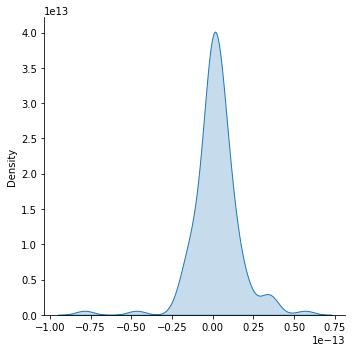

In [30]:
sns.displot(mean_over_col, kind="kde", fill=True)


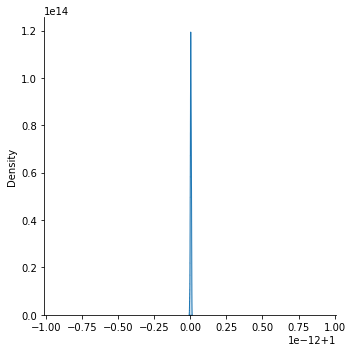

In [31]:
sns.displot(std_over_col, kind="kde", fill=True)

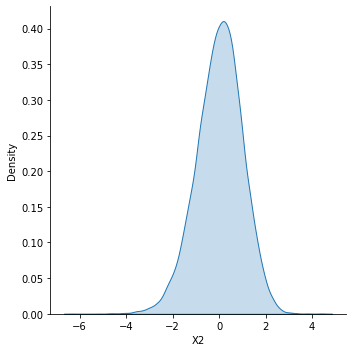

In [33]:
sns.displot(BTProjArchCaA1CaA2_features, x="X2", kind="kde", fill=True)



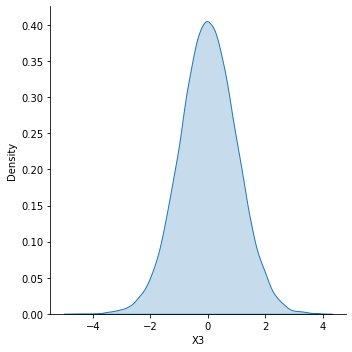

In [34]:
sns.displot(BTProjArchCaA1CaA2_features, x="X3", kind="kde", fill=True)

In [35]:
BTProjArchCaA1CaA2_features["X3"].mean()

1.9340387282521517e-15

In [37]:
BTProjArchCaA1CaA2_features["X2"].std()

0.9999999999999968

In [57]:
# Create slides_format slides
case_id = []
slide_id = []
label_id = []
label = []
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "CaA1")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("CaA1")
        label.append("CaA1")
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "CaA2")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("CaA2")
        label.append("CaA2")
slides_format = pd.DataFrame({"case_id":case_id,
                              "slide_id": slide_id,
                              "label_id": label_id,
                              "label": label})
slides_format.head()

,case_id,slide_id,label_id,label
0,TNE0993,TNE0993,CaA1,CaA1
1,TNE1448,TNE1448,CaA1,CaA1
2,TNE0889,TNE0889,CaA1,CaA1
3,TNE0001,TNE0001,CaA1,CaA1
4,TNE0075,TNE0075,CaA1,CaA1


In [59]:
slides_format.to_csv( os.path.join(root_data, "dataRoFormer", "slides_format.csv"))

## Redo the experience scalining vector by TNE IDBUT unbalanced

In [3]:
BT_all_proj = pd.read_csv("/home/mathiane/LNENWork/LNEN_Molecular_groups_barlow_twin/projector/projector_concat_path_review.csv")
BT_all_proj  = BT_all_proj.iloc[:,range(1,BT_all_proj.shape[1],1)]
TNEID_arch = pd.read_csv("TNEID_arch.csv")
BTProjArch = BT_all_proj.merge(TNEID_arch, left_on='tne_id_c',  right_on='tne_id' , how='inner')
print(BT_all_proj.shape, BTProjArch.shape )
print(BTProjArch.head())
BTProjArch  = BTProjArch.rename(columns={"archetype_k4_LF3_label": "arch"})
BTProjArchCaA1 = BTProjArch[BTProjArch["arch"].isin(["CaA1"])]
BTProjArchCaA2 = BTProjArch[BTProjArch["arch"].isin(["CaA2"])]
print(BTProjArchCaA1.shape, BTProjArchCaA2.shape)
BTProjArchCaA1.groupby('tne_id_c')['arch'].value_counts().nunique()
BTProjArchCaA1_s = BTProjArchCaA1[BTProjArchCaA1["tne_id_c"].isin(list(set(BTProjArchCaA1["tne_id_c"])))]
BTProjArchCaA1CaA2_s = pd.concat([BTProjArcbhCaA2, BTProjArchCaA1_s])

(4126674, 134) (3004791, 137)
         X0        X1        X2        X3        X4        X5        X6  \
0  0.010731 -0.017492 -0.053791  0.006058 -0.040010  0.006106 -0.024915   
1  0.003174 -0.002447 -0.040421  0.000079 -0.030701  0.005880 -0.027878   
2 -0.010324 -0.008172 -0.039857 -0.003609 -0.023241 -0.007832 -0.032735   
3  0.011308 -0.018657 -0.060345  0.015401 -0.023393 -0.007311 -0.022321   
4 -0.000423 -0.025801 -0.052976  0.005961 -0.026089 -0.010742 -0.021492   

         X7        X8        X9  ...      X127               img_id  tne_id_x  \
0 -0.011729  0.007921 -0.019953  ... -0.016012  TNE1019_30721_19585   TNE1019   
1 -0.006616  0.011590 -0.017226  ...  0.005784  TNE1019_33409_28801   TNE1019   
2 -0.020779  0.005676 -0.015500  ...  0.010942  TNE1019_45313_14209   TNE1019   
3 -0.004438  0.009153 -0.019563  ... -0.010705   TNE1019_9985_23809   TNE1019   
4 -0.003688  0.008236 -0.015210  ... -0.007972  TNE1019_15361_11905   TNE1019   

              img_id_c  tne_id_c

In [4]:
len(set(BTProjArchCaA1["tne_id_c"]))

70

In [5]:
len(set(BTProjArchCaA2["tne_id_c"]))

60

In [8]:
TNEID_arch[TNEID_arch["archetype_k4_LF3_label"]=="CaA1"].shape

(72, 3)

In [9]:
CaA1_tne_id = TNEID_arch[TNEID_arch["archetype_k4_LF3_label"]=="CaA1"]["tne_id"]

In [14]:
set(CaA1_tne_id) - set(BTProjArchCaA1["tne_id_c"])

{'TNE0416', 'TNE1432'}

In [18]:
CaA2_tne_id = TNEID_arch[TNEID_arch["archetype_k4_LF3_label"]=="CaA2"]["tne_id"]

In [20]:
set(CaA2_tne_id) - set(BTProjArchCaA2["tne_id_c"])

{'TNE0479'}

In [17]:
set(BT_all_proj["tne_id_c"])

{'TNE0001',
 'TNE0002',
 'TNE0003',
 'TNE0004',
 'TNE0005',
 'TNE0006',
 'TNE0007',
 'TNE0008',
 'TNE0009',
 'TNE0011',
 'TNE0015',
 'TNE0016',
 'TNE0017',
 'TNE0018',
 'TNE0019',
 'TNE0025',
 'TNE0027',
 'TNE0028',
 'TNE0031',
 'TNE0033',
 'TNE0034',
 'TNE0056',
 'TNE0057',
 'TNE0058',
 'TNE0060',
 'TNE0061',
 'TNE0069',
 'TNE0071',
 'TNE0072',
 'TNE0073',
 'TNE0075',
 'TNE0077',
 'TNE0078',
 'TNE0079',
 'TNE0080',
 'TNE0081',
 'TNE0180',
 'TNE0181',
 'TNE0227',
 'TNE0228',
 'TNE0229',
 'TNE0230',
 'TNE0231',
 'TNE0232',
 'TNE0233',
 'TNE0234',
 'TNE0235',
 'TNE0263',
 'TNE0286',
 'TNE0305',
 'TNE0308',
 'TNE0340',
 'TNE0341',
 'TNE0360',
 'TNE0387',
 'TNE0390',
 'TNE0403',
 'TNE0404',
 'TNE0405',
 'TNE0406',
 'TNE0407',
 'TNE0408',
 'TNE0417',
 'TNE0451',
 'TNE0485',
 'TNE0491',
 'TNE0499',
 'TNE0504',
 'TNE0515',
 'TNE0524',
 'TNE0531',
 'TNE0541',
 'TNE0542',
 'TNE0543',
 'TNE0546',
 'TNE0551',
 'TNE0561',
 'TNE0795',
 'TNE0797',
 'TNE0798',
 'TNE0803',
 'TNE0806',
 'TNE0807',
 'TN

In [12]:
def save_hdf5(output_path, asset_dict, attr_dict=None, mode="a"):
    file = h5py.File(output_path, mode)
    for key, val in asset_dict.items():
        data_shape = val.shape
        if key not in file:
            data_type = val.dtype
            chunk_shape = (1,) + data_shape[1:]
            maxshape = (None,) + data_shape[1:]
            dset = file.create_dataset(
                key,
                shape=data_shape,
                maxshape=maxshape,
                chunks=chunk_shape,
                dtype=data_type,
            )
            dset[:] = val
            if attr_dict is not None:
                if key in attr_dict.keys():
                    for attr_key, attr_val in attr_dict[key].items():
                        dset.attrs[attr_key] = attr_val
        else:
            dset = file[key]
            dset.resize(len(dset) + data_shape[0], axis=0)
            dset[-data_shape[0] :] = val
    file.close()
    return output_path

In [13]:
root_data = "/home/mathiane/LNENWork/data_RoFormerMIL_CaA1CaA2_norm"
os.makedirs(root_data, exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files", "CaA1"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files", "CaA2"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table", "CaA1"), exist_ok=True)
os.makedirs( os.path.join(root_data, "coords_table", "CaA2"), exist_ok=True)

for tneid in set(BTProjArchCaA1CaA2_s["tne_id_c"]):
    print("Tneid = ", tneid)
    BTProjArchCaA1CaA2_c = BTProjArchCaA1CaA2_s[BTProjArchCaA1CaA2_s["tne_id_c"] == tneid]
    BTProjArchCaA1CaA2_c = BTProjArchCaA1CaA2_c.sort_values(by=["x","y"])
    BTProjArchCaA1CaA2_c["x_rank"] = BTProjArchCaA1CaA2_c["x"].rank(method="min")-1
    BTProjArchCaA1CaA2_c["y_rank"] = BTProjArchCaA1CaA2_c["y"].rank(method="min")-1
    BTProjArchCaA1CaA2_c["x_rank"] = BTProjArchCaA1CaA2_c["x_rank"].astype(int)
    BTProjArchCaA1CaA2_c["y_rank"] = BTProjArchCaA1CaA2_c["y_rank"].astype(int)
    
    BTProjArchCaA1CaA2_features =  BTProjArchCaA1CaA2_c.iloc[:,0:128]
    BTProjArchCaA1CaA2_features=(BTProjArchCaA1CaA2_features-BTProjArchCaA1CaA2_features.mean(axis=0))/BTProjArchCaA1CaA2_features.std(axis=0)
    # print("BT normalized_df " , normalized_df.shape, normalized_df.head)
    # print("BT BTProjArchCaA1CaA2_features std " , BTProjArchCaA1CaA2_features.mean(), BTProjArchCaA1CaA2_features.std())
    # mean_over_col = BTProjArchCaA1CaA2_features.mean()
    # std_over_col=  BTProjArchCaA1CaA2_features.std()
    BTProjArchCaA1CaA2_coords = BTProjArchCaA1CaA2_c[["img_id_c", "x","y", "x_rank", "y_rank"]]
    BTProjArchCaA1CaA2_coords_for_export = BTProjArchCaA1CaA2_coords[["x_rank", "y_rank"]]
    #print(BTProjArchCaA1CaA2_coords.head())
    
    archetype_c = list(BTProjArchCaA1CaA2_c["arch"])[0]
    print(archetype_c)
    asset_dict_tumor = {   
        "coords": BTProjArchCaA1CaA2_coords_for_export.to_numpy(),
        "features": BTProjArchCaA1CaA2_features.to_numpy(dtype='float32'),
            }
    
    
    h5_file_tumor = os.path.join(root_data, "features_h5_files", archetype_c, tneid + ".h5" )
    save_hdf5(h5_file_tumor, asset_dict_tumor, attr_dict=None, mode = "w")
    
    coords_tumor_filename = os.path.join(root_data, "coords_table", archetype_c, tneid + "coords.csv" )
    BTProjArchCaA1CaA2_coords.to_csv(coords_tumor_filename, index=False )
    
    print("___________________________________________________ \n")

Tneid =  TNE1078
CaA1
___________________________________________________ 

Tneid =  TNE0963
CaA2
___________________________________________________ 

Tneid =  TNE0870
CaA1
___________________________________________________ 

Tneid =  TNE1079
CaA1
___________________________________________________ 

Tneid =  TNE1508
CaA2
___________________________________________________ 

Tneid =  TNE0962
CaA1
___________________________________________________ 

Tneid =  TNE1414
CaA2
___________________________________________________ 

Tneid =  TNE1431
CaA1
___________________________________________________ 

Tneid =  TNE0974
CaA1
___________________________________________________ 

Tneid =  TNE0001
CaA1
___________________________________________________ 

Tneid =  TNE1080
CaA2
___________________________________________________ 

Tneid =  TNE1499
CaA2
___________________________________________________ 

Tneid =  TNE0986
CaA2
___________________________________________________ 

Tneid =  TNE

In [16]:
# Create slides_format slides
case_id = []
slide_id = []
label_id = []
label = []
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "CaA1")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("CaA1")
        label.append("CaA1")
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "CaA2")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("CaA2")
        label.append("CaA2")
slides_format = pd.DataFrame({"case_id":case_id,
                              "slide_id": slide_id,
                              "label_id": label_id,
                              "label": label})
print(slides_format.head())
os.makedirs(os.path.join(root_data, "dataRoFormer"), exist_ok=True)

slides_format.to_csv( os.path.join(root_data, "dataRoFormer", "slides_format.csv"))


   case_id slide_id label_id label
0  TNE1794  TNE1794     CaA1  CaA1
1  TNE0993  TNE0993     CaA1  CaA1
2  TNE1448  TNE1448     CaA1  CaA1
3  TNE0889  TNE0889     CaA1  CaA1
4  TNE0001  TNE0001     CaA1  CaA1
